# About

- Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

- Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

- Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# Objective

## The company wants to know:

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands

## Dataset Link:

**Dataset :** [yulu_data.csv](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089)

# Importing Libraries And Loading the Dataset.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import datetime as dt
from scipy.stats import ttest_ind,levene,shapiro,f_oneway,chi2_contingency
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# Basic Analysis

In [2]:
df.shape

(10886, 12)

### Analysis:

- Number of rows = 10886

- Number of columns = 12

In [3]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

# Data Description.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- All Columns are Numeric except datetime column.
- There are no missing values in the dataframe.
- Categorical value like season,holiday,weather,etc. are int64 we will convert them to categorical value.
- Convert datetime  from object type to datetime type.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


# Data Processing.

## Converting 'datetime' to datetime.

In [6]:
df['datetime']=pd.to_datetime(df['datetime'])
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

## Converting season,weather,holiday and workingday columns into categorical

In [7]:
def season_type(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'

df['season']=df['season'].apply(lambda x:season_type(x))

df['season']= pd.Categorical(df['season'])
df['weather']=pd.Categorical(df['weather'])
df['holiday']=pd.Categorical(df['holiday'])
df['workingday']=pd.Categorical(df['workingday'])

## Statistical Summary after data-type conversion

In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477
registered,10886.0,155.552177,0.0,36.0,118.0,222.0,886.0,151.039033
count,10886.0,191.574132,1.0,42.0,145.0,284.0,977.0,181.144454


# Outlier Detection using the z-score method

- We can detect outliers in numeric column using the z-score.

- If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

- z score= (x-mean)/std.deviation.


In [9]:
outliers={}
for col in df.select_dtypes(include=np.number):
    
    #finding z-score for each value in a column
    z_score= np.abs((df[col]-df[col].mean()))/df[col].std()
    
    # if the z score of a value is a grater than 3 than the value is outlier
    column_outliers=df[z_score > 3][col]
    
    outliers[col]=column_outliers
    
for col,outlier_values in outliers.items():
    print(f"Outliers for {col} column")
    print(outlier_values)
    print()

Outliers for temp column
Series([], Name: temp, dtype: float64)

Outliers for atemp column
Series([], Name: atemp, dtype: float64)

Outliers for humidity column
1091    0
1092    0
1093    0
1094    0
1095    0
1096    0
1097    0
1098    0
1099    0
1100    0
1101    0
1102    0
1103    0
1104    0
1105    0
1106    0
1107    0
1108    0
1109    0
1110    0
1111    0
1112    0
Name: humidity, dtype: int64

Outliers for windspeed column
265      39.0007
613      39.0007
750      43.9989
752      40.9973
753      40.9973
          ...   
9481     43.0006
9482     43.0006
9484     39.0007
9754     39.0007
10263    43.0006
Name: windspeed, Length: 67, dtype: float64

Outliers for casual column
1384     219
1385     240
1935     196
2127     195
2129     206
        ... 
10226    195
10227    262
10228    292
10229    304
10230    260
Name: casual, Length: 292, dtype: int64

Outliers for registered column
6611     623
6634     614
6635     638
6649     628
6658     642
        ... 
10702  

## Observations:

- There no outliers in 'temp' and 'atemp' column.
- Outliers are evident within the 'humidity' and 'windspeed' columns based on the observations.
- Outliers are noticeable in the counts of casual and registered users, though drawing definite conclusions necessitates analyzing their relationship with independent variables.

# Univariate Analysis.

## Distribution of Working Day.

In [10]:
workingday_df=df.groupby(['workingday'],observed=False).agg(number_of_cycles_rented=('count','sum')).reset_index()
workingday_df

,workingday,number_of_cycles_rented
0,0,654872
1,1,1430604


In [11]:
labels= workingday_df['workingday']
values= workingday_df['number_of_cycles_rented']

colors = ['#C0E0DE','#4F7CAC']

bar_chart = go.Figure(go.Bar(x=labels, y=values, marker_color=colors))
bar_chart

### Conclusion

- On working days, 68.6% of cycles are rented, whereas on non-working days, 31.4% of cycles are rented.

## Distribution of Season.

In [12]:
season_df=df.groupby(['season'],observed=False).agg(number_of_cycles_rented=('count','sum')).reset_index()
season_df

,season,number_of_cycles_rented
0,fall,640662
1,spring,312498
2,summer,588282
3,winter,544034


In [13]:
labels= season_df['season']
values= season_df['number_of_cycles_rented']

colors = ['#D4D2A5','#FCDEBE','#ddbea9','#ffc8dd']

bar_chart = go.Figure(go.Bar(x=labels, y=values, marker_color=colors))
bar_chart

### Conclusion.

- During the fall season, approximately 30.7% of cycles are rented.
- In the summer season, around 28.2% of cycles are rented.
- The winter season records a rental rate of about 26.1% for cycles.
- The lowest rental rate, at just 15%, is observed in the spring season.

## Distribution Of Weather.

In [14]:
weather_df=df.groupby(['weather'],observed=False).agg(number_of_cycles_rented=('count','sum')).reset_index()
weather_df

,weather,number_of_cycles_rented
0,1,1476063
1,2,507160
2,3,102089
3,4,164


In [15]:
labels= weather_df['weather']
values= weather_df['number_of_cycles_rented']

#create pie chart
# Create pie chart
colors =  ["#b9e769","#efea5a","#f1c453"]

bar_chart = go.Figure(go.Bar(x=labels, y=values, marker_color=colors))
bar_chart


### Conclusion.

- Weather condition 1 experiences the highest rental rate, with approximately 70.8% of cycles rented.
- In weather condition 2, around 24.3% of cycles are rented.
- Weather condition 3 has a rental rate of approximately 4.9% for cycles.
- Weather condition 4 exhibits an exceptionally low rental rate, with only 0.00786% of cycles being rented.

## Trends in Average Cycle rentals(Hourly).

In [16]:
hour_df=df.groupby(df['datetime'].dt.hour).agg(average_cycles_rented=('count','mean')).reset_index()
hour_df

,datetime,average_cycles_rented
0,0,55.138462
1,1,33.859031
2,2,22.899554
3,3,11.757506
4,4,6.407240
5,5,19.767699
6,6,76.259341
7,7,213.116484
8,8,362.769231
9,9,221.780220


In [17]:
fig = px.line(hour_df, x='datetime', y='average_cycles_rented', markers=True)
fig.update_xaxes(tickvals=list(range(25)))
fig.update_layout(title='Average cycles rented in hourly basis',
                   xaxis_title='Hours',
                   yaxis_title='Average cycles rented')
fig.show()

### Conclusion.

- The highest average count of rental bikes is observed at 5 PM, closely followed by 6 PM and 8 AM. This indicates distinct peak hours during the day when cycling is most popular.
- Conversely, the lowest average count of rental bikes occurs at 4 AM, with 3 AM and 5 AM also showing low counts. These hours represent the early morning period with the least demand for cycling.
- Notably, there is an increasing trend in cycle rentals between 5 AM and 8 AM, suggesting a surge in demand during the early morning hours as people start their day.
- Additionally, there is a decreasing trend in cycle rentals from 5 PM to 11 PM, indicating a gradual decline in demand as the day progresses into the evening and nighttime.

## Trends in Average Cycle rentals(Monthly).

In [18]:
month_df=df.groupby(df['datetime'].dt.month).agg(average_cycles_rented=('count','mean')).reset_index()
month_df

,datetime,average_cycles_rented
0,1,90.366516
1,2,110.003330
2,3,148.169811
3,4,184.160616
4,5,219.459430
5,6,242.031798
6,7,235.325658
7,8,234.118421
8,9,233.805281
9,10,227.699232


In [19]:
fig = px.line(month_df, x='datetime', y='average_cycles_rented', markers=True)
fig.update_xaxes(tickvals=list(range(1,13)),ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.update_layout(title='Average cycles rented on monthly basis',
                   xaxis_title='Month',
                   yaxis_title='Average cycles rented')
fig.show()

### Conclusion.

- The highest average hourly count of rental bikes occurs in June, July, and August, reflecting the peak demand during summer.
- Conversely, the lowest average hourly count of rental bikes is found in January, February, and March, which are the winter months with reduced cycling activity.
- Notably, there is an increasing trend in average bike rentals from February to June, corresponding to the shift from winter to spring and summer.
- Conversely, a decreasing trend in average bike rentals is observed from October to December due to the onset of winter.

## Distribution of temp, atemp, humidity and windspeed

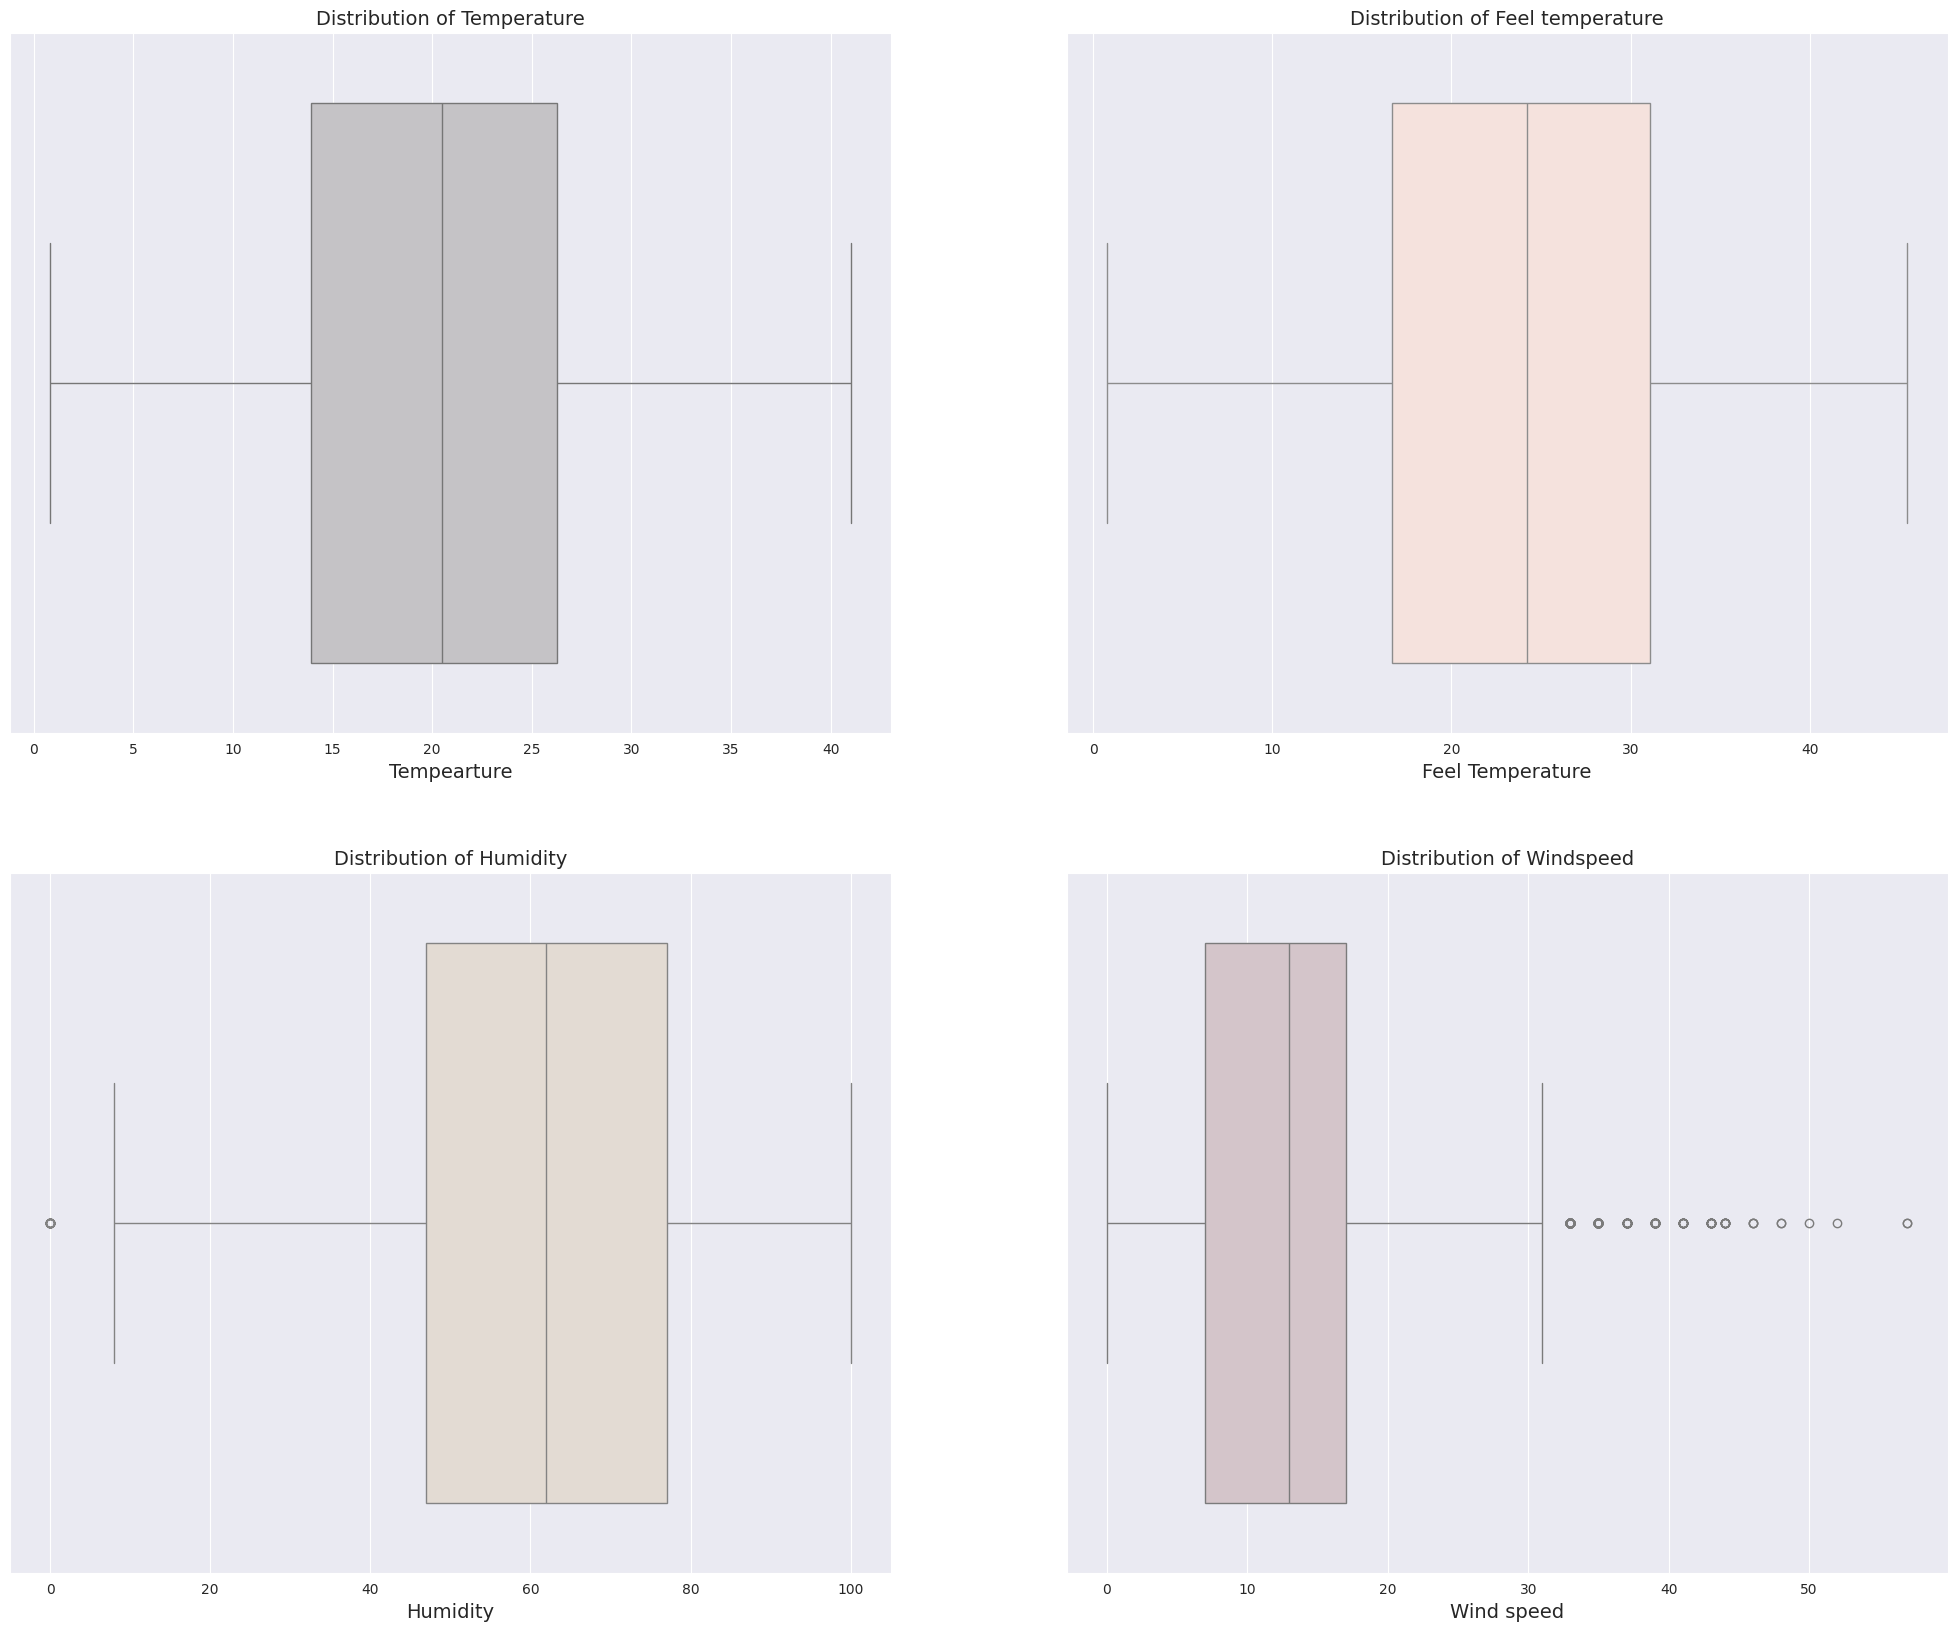

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,20))

# temp column 
plt.subplot(2,2,1)
sns.boxplot(data=df,x='temp',color='#C5C3C6')
plt.xlabel('Tempearture',fontsize=14)
plt.title('Distribution of Temperature',fontsize=14)

#feel temperature
plt.subplot(2,2,2)
sns.boxplot(data=df,x='atemp',color='#F9E0D9')
plt.xlabel('Feel Temperature',fontsize=14)
plt.title('Distribution of Feel temperature',fontsize=14)

#Humidity
plt.subplot(2,2,3)

sns.boxplot(data=df,x='humidity',color='#E6DBD0')
plt.xlabel('Humidity',fontsize=14)
plt.title('Distribution of Humidity',fontsize=14)

#Wind Speed
plt.subplot(2,2,4)
sns.boxplot(data=df,x='windspeed',color='#D6C3C9')
plt.xlabel('Wind speed',fontsize=14)
plt.title('Distribution of Windspeed',fontsize=14)


plt.show()

### Conclusion.

- No outliers are detected in the 'temp' and 'atemp' columns, suggesting that the temperature-related data points fall within the expected range.
- In the 'humidity' column, a single value is identified as an outlier, implying an unusual humidity measurement distinct from the others.
- The 'windspeed' column contains 12 outlier values, indicating instances where wind speed measurements significantly deviate from the typical range.

## Distribution of Casual count, Registered count and Total count

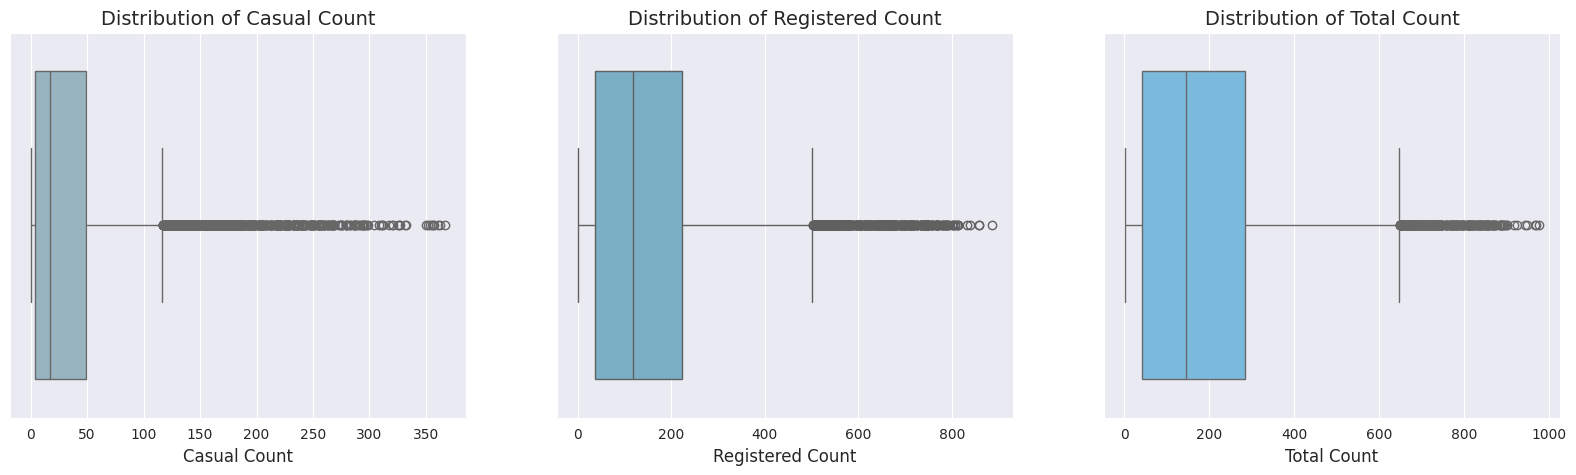

In [21]:


plt.figure(figsize=(20,5))

# Boxplot for temp column 
plt.subplot(1,3,1)
sns.boxplot(data=df,x='casual',color='#91B7C7')
plt.xlabel('Casual Count',fontsize=12)
plt.title('Distribution of Casual Count',fontsize=14)

#Boxplot for feel temperature
plt.subplot(1,3,2)
sns.boxplot(data=df,x='registered',color='#6EB4D1')
plt.xlabel('Registered Count',fontsize=12)
plt.title('Distribution of Registered Count',fontsize=14)

#Boxplot for Humidity
plt.subplot(1,3,3)
sns.boxplot(data=df,x='count',color='#6CBEED')
plt.xlabel('Total Count',fontsize=12)
plt.title('Distribution of Total Count',fontsize=14)


plt.show()



### Conclusion.

- The box plot clearly indicates the presence of outliers in the number of casual and registered users. However, further analysis against independent variables is needed before making definitive comments.
- The box plot reveal data skewness. As we proceed, we will decide whether to address outliers or perform variable transformation. In this case, given the significant number of outliers, variable transformation, specifically Log Transformation, seems to be a more appropriate approach.

# Bivariate Analysis.

## Distribution of count of rented bikes across working day

Text(0, 0.5, 'Probablity Density')

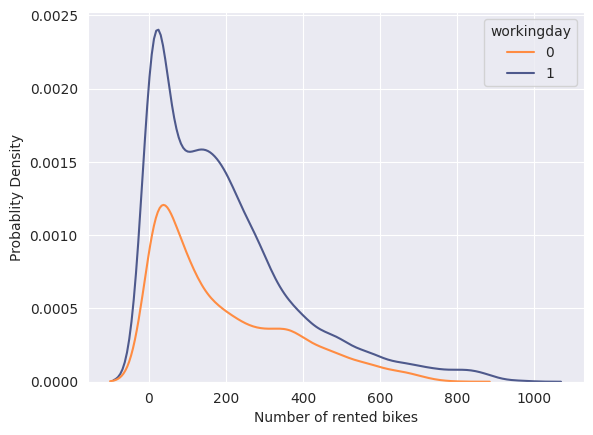

In [22]:
sns.set_style('darkgrid')
sns.kdeplot(data=df,x='count',hue='workingday',palette=['#FF8C42','#4E598C'])
plt.xlabel('Number of rented bikes')
plt.ylabel('Probablity Density')

### Conclusion.

The probability of renting bikes on a working day appears to be higher than on a non-working day, as evidenced by our univariate analysis, where 68.6% of bike rentals occurred on working days compared to 31.4% on non-working days. However, we will further investigate this through hypothesis testing to determine if the working day indeed has a statistically significant effect on the number of cycles rented."

## Distribution of count of rented bikes across Season

Text(0, 0.5, 'Number of bikes rented')

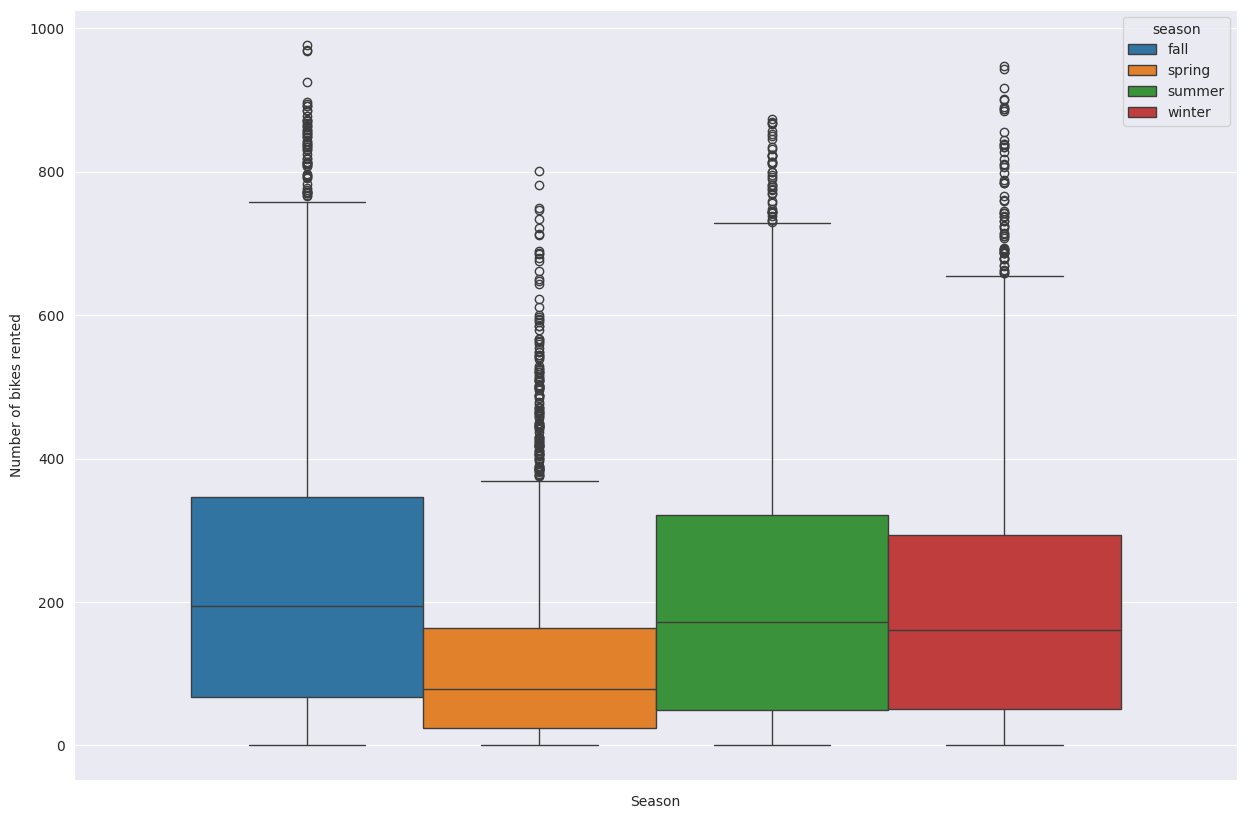

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,y='count',hue='season')
plt.xlabel('Season')
plt.ylabel('Number of bikes rented')

### Conclusion.

The probability of renting a bike during the fall season appears to be higher compared to other seasons. Conversely, the probability of renting bikes during the winter and spring seasons is lower in comparison to summer and fall.

## Distribution of count of rented bikes across Weather types

/tmp/ipykernel_7078/3995104985.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Number of bikes rented')

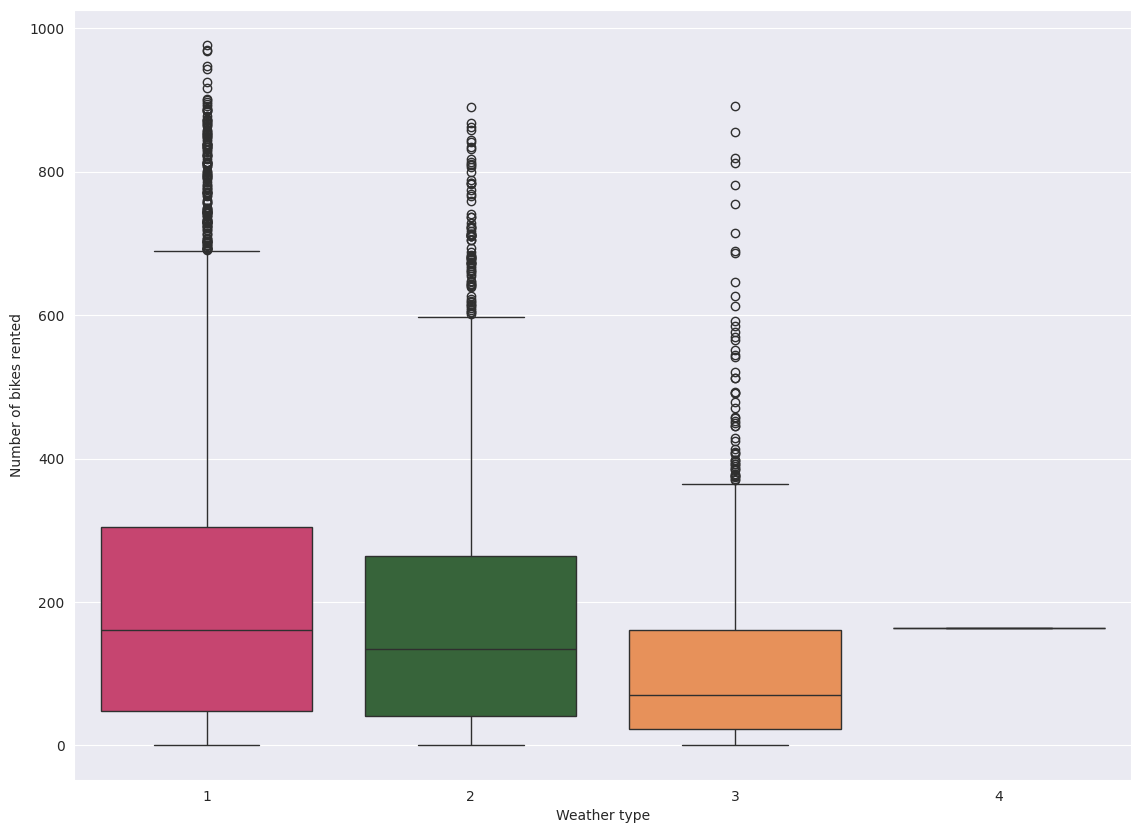

In [24]:
plt.figure(figsize=(30,10))

plt.subplot(1,2,2)
sns.boxplot(data=df,y='count',x='weather',palette=['#DB3069','#306B34','#FF8C42','#586BA4'])
plt.xlabel('Weather type')
plt.ylabel('Number of bikes rented')

### Conclusion.

The probability of renting a bike during weather condition 1 appears to be higher than in other weather types. This is supported by our univariate analysis, where approximately 70.8% of bike rentals occur in weather condition 1, while the remaining weather types collectively account for approximately 29% of bike rentals.

## Heatmap and Correlation

<Axes: >

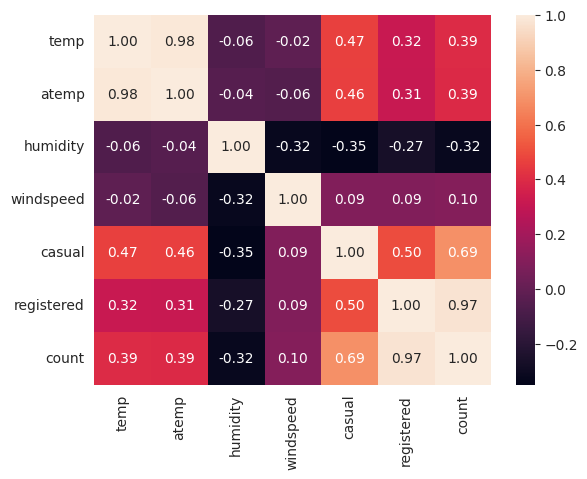

In [25]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f')

## Conclusion.

- The weak positive correlation of 0.39 between temperature and the number of bikes rented suggests that, on average, fewer people prefer to use electric cycles during the daytime between 12 PM to 3 PM. This observation aligns with our univariate analysis, where we discovered that the average number of cycles rented during this time frame was lower compared to other times of the day. A similar correlation pattern is also observed in the case of "feels-like" temperature, reinforcing this trend.

- The negative correlation between humidity and the number of cycles rented indicates that people tend to avoid using electric bikes during high humidity conditions.

- The presence of a weak positive correlation between windspeed and the number of cycles rented indicates that there is a subset of individuals who appear to favor using electric cycles during windy conditions for the sheer enjoyment of the experience. While this preference contributes to a slight increase in bike rentals on windier days, it's essential to recognize that this effect is not particularly strong, as indicated by the weak correlation.

# Hypothesis Testing.

## Effect of working Day on the number of electric cycles rented.

### Formulating Null and Alternative Hypotheses

- H0 : Working day does not have an effect on number of cycles rented
- Ha: Working day does have an effect on number of cycles rented

**Assumptions of a T Test**

- Independence : The observations in one sample are independent of the observations in the other sample.
-  Normality : Both samples are approximately normally distributed.
-  Homogenity of Variances : Both samples have approximately the same variance.
- Random Sampling : Both samples were obtained using random sampling method

### Normality Check: Wilkin Shapiron Test¶

__Generate a sample of 300 bike rentals, randomly selected from both working days and non-working days__

In [26]:
workingday_sample=df[df['workingday']==1]['count'].sample(300)
nonworkingday_sample=df[df['workingday']==0]['count'].sample(300)

**Checking normality using histogram.**

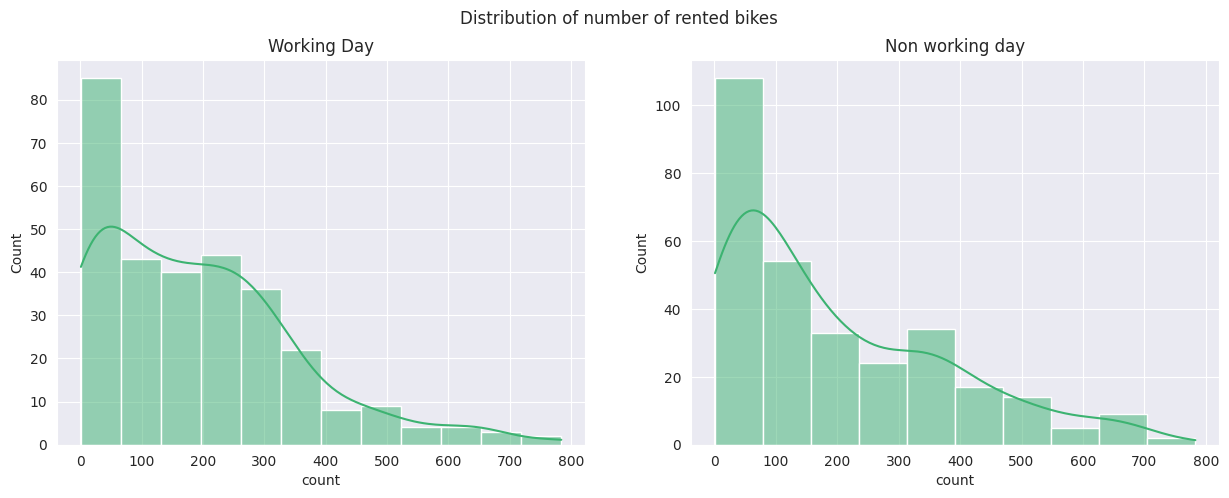

In [27]:
plt.figure(figsize=(15,5))

#histogram for working day sample
plt.subplot(1,2,1)
sns.histplot(workingday_sample,kde=True,color='mediumseagreen')
plt.title('Working Day')

#histogram for non working day sample
plt.subplot(1,2,2)
sns.histplot(nonworkingday_sample,kde=True,color='mediumseagreen')
plt.title('Non working day')

plt.suptitle('Distribution of number of rented bikes')
plt.show()

**Conclusion.**

- The counts of rented cycles on both working and non-working days do not follow a normal distribution.
- We can try to convert the distribution to normal by applying log transformation

**Converting sample distribution to normal by applying log transformation**

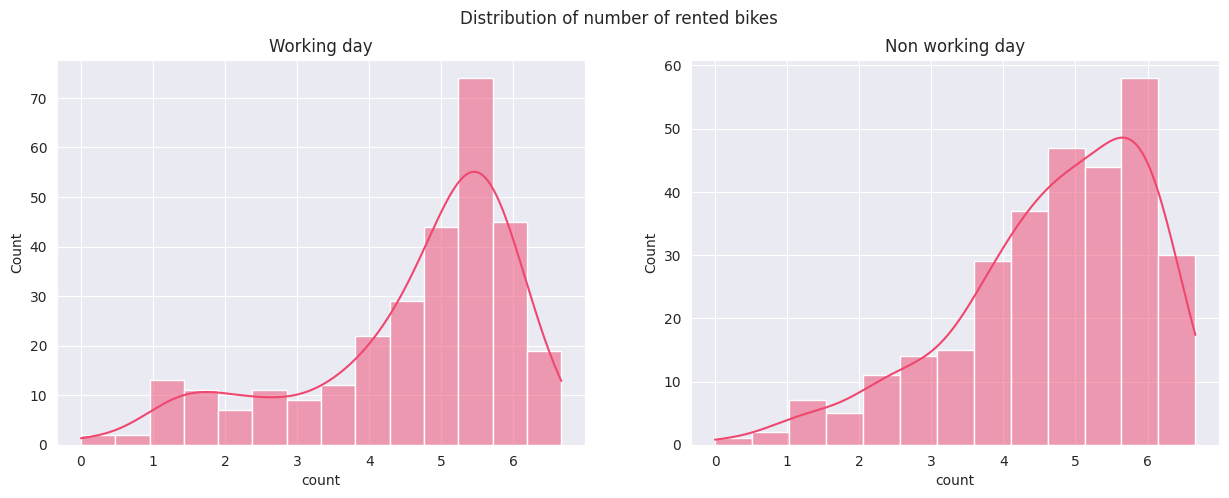

In [28]:
plt.figure(figsize=(15,5))

#histogram for working day sample
plt.subplot(1,2,1)
sns.histplot(np.log(workingday_sample),kde=True,color='#ef476f')
plt.title('Working day')

#histogram for non working day sample
plt.subplot(1,2,2)
sns.histplot(np.log(nonworkingday_sample),kde=True,color='#ef476f')
plt.title('Non working day')

plt.suptitle('Distribution of number of rented bikes')
plt.show()

**Conclusion**

- Upon implementing a log transformation on our continuous variables, we observed a substantial improvement in achieving a distribution that closely resembles normality for both the workingday_sample and nonworkingday_sample

**Conducting the Wilk-Shapiro Test to assess the normality of the log-normal distribution obtained in the previous step**

**_Performing the Wilk-Shapiro test for the workingday sample_**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

- H0 : The Working day samples are normally distributed
- Ha: The Working day samples are not normally distributed

In [29]:
test_stat,p_value= shapiro(np.log(workingday_sample))
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The working day samples are not normally distributed ")
else:
 print("Fail to Reject Ho: The working day samples are normally distributed")

test stat : 0.8739916674957608
p value : 5.680348191904423e-15
Reject Ho: The working day samples are not normally distributed 


**Conclusion.**

- From the above output, we see that the p value is far less than 0.05, Hence we reject the null hypothesis.
- We have sufficient evidence to say that the working day sample data does not come from normal distribution.

**_Performing the Wilk-Shapiro test for the non-working day sample_**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

- H0 : The non working day samples are normally distributed
- Ha: The non working day samples are not normally distributed

**Conclusion.**

- From the above output, we see that the p value is far less than 0.05, Hence we reject the null hypothesis.
- We have sufficient evidence to say that the **non working day sample** data does not come from normal distribution.

### Homegenity of Variance test : Levene's Test

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

- H0 : Variance is equal in both working day count and non working day count samples
- Ha: Variances is not equal

In [30]:
test_stat,p_value= levene(np.log(workingday_sample),np.log(nonworkingday_sample))
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Variance is not equal ")
else:
 print("Fail to Reject Ho: Variance is equal in both working day count and non working day count samples")

test stat : 0.1809231476964843
p value : 0.670734121817285
Fail to Reject Ho: Variance is equal in both working day count and non working day count samples


**Conclusion**

- Since pvalue is not less than 0.05, we fail to reject null hypothesis.
- This means we do not have sufficient evidence to say that variance across workingday count and non workingday count is significantly different thus making the assumption of homogenity of variances true

### T-Test and final conclusion

- 3 out of 4 assumptions for T test has been satified.
- Although the sample distribution did not meet the criteria of passing the normality test, we proceed with the T-test as per the given instructions.

For T-Test we select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

- H0 : Working day does not have an effect on number of cycles rented
- Ha: Working day does have an effect on number of cycles rented

In [31]:
t_stat,p_value= ttest_ind(np.log(workingday_sample),np.log(nonworkingday_sample),equal_var=True)
print("f stat :",t_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Working day does have an effect on number of cycles rented ")
else:
 print("Fail to Reject Ho: Working day does not have an effect on number of cycles rented")

f stat : -0.6595940855700191
p value : 0.5097682853901802
Fail to Reject Ho: Working day does not have an effect on number of cycles rented


**Conclusion**

- Since the p-value of our test is greater than alpha which is 0.05, we fail to reject the null hypothesis of this test.
- we do not have sufficient evidence to conclude that working days have a significant effect on the number of cycles rented. This suggests that there is no significant difference in the number of cycles rented on working days versus non-working days.

## Whether No. of cycles rented is similar or different in different weather.

**To perform such an analyis, we use ANOVA test**:

- ANOVA, which stands for Analysis of Variance, is a statistical technique used to assess whether there is a statistically significant difference among the means of two or more categorical groups. It achieves this by testing for variations in means by examining the variance within and between these groups.

- The 4 different weather conditions are as follows:

     1. Clear, Few clouds, partly cloudy, partly cloudy
     2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
     3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
     4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

We have to check if there is any significant difference in the number of bikes rented across different weather conditions. To analyse this, we use Annova test.


### Formulatting Null and Alternate Hypothesis

In [32]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

**Conclusion**

- Because the weather condition "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" has only happened once in our dataset, we don't have enough information to decide if it really affects bike rentals. To prevent any skewed results, it's best to remove this rare weather type from our analysis.

__We shall setup the Null and Alternate Hypothesis to check if there is any effect of weather on the number of cycles rented.__

- H0 : The mean number of cycles rented is the same across all three different weather types.
- Ha : There is at least one weather type with a mean number of cycles rented that significantly differs from the overall mean of the dependent variable.

**Assumptions for ANOVA Test**

- The distributions of data of each group should follow the Gaussian Distribution.
- The variance of each group should be the same or close to each other.
- The total n observations present should be independent of each other.

### Normality Test: Shapiro-Wilk Test

**Generate a sample of 300 data points for each weather condition**

In [33]:
sample_1= df[df['weather']==1]['count'].sample(500)
sample_2 = df[df['weather']==2]['count'].sample(500)
sample_3 = df[df['weather']==3]['count'].sample(500)

**Checking normality using histogram.**

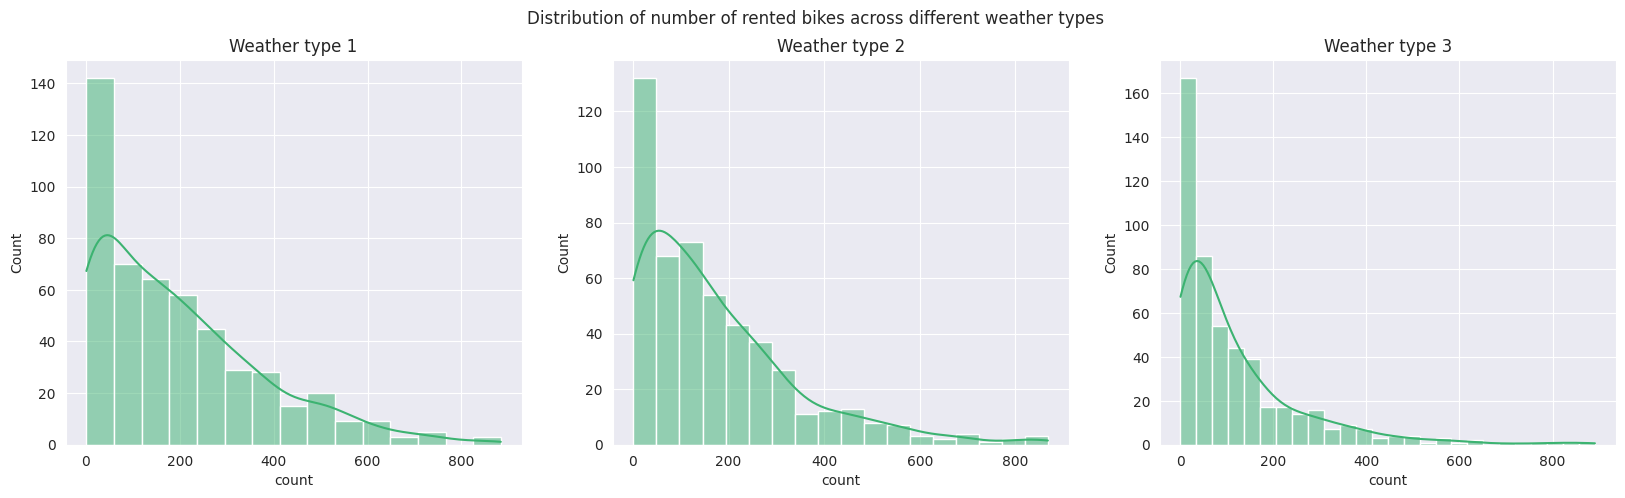

In [34]:
plt.figure(figsize=(20,5))

#histogram for weather condition 1
plt.subplot(1,3,1)
sns.histplot(sample_1,kde=True,color='mediumseagreen')
plt.title('Weather type 1')

#histogram for weather condition 2 
plt.subplot(1,3,2)
sns.histplot(sample_2,kde=True,color='mediumseagreen')
plt.title('Weather type 2')

#histogram for weather condition 3 
plt.subplot(1,3,3)
sns.histplot(sample_3,kde=True,color='mediumseagreen')
plt.title('Weather type 3')

plt.suptitle('Distribution of number of rented bikes across different weather types')
plt.show()

**Conclusion**

We see that none of the graphs are normally distributed. Hence we apply log transformation to make these distributions near to normal

**Converting sample distribution to normal by applying log transformation**

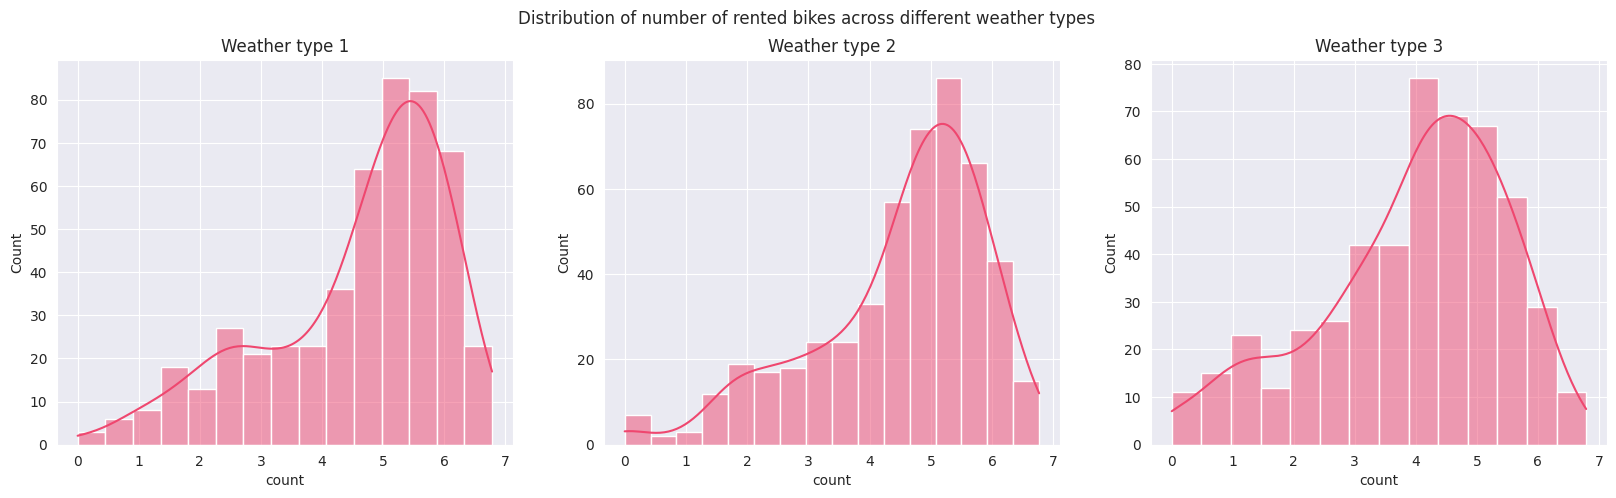

In [35]:
log_1=np.log(sample_1)
log_2=np.log(sample_2)
log_3=np.log(sample_3)

plt.figure(figsize=(20,5))

#histogram for weather condition 1
plt.subplot(1,3,1)
sns.histplot(log_1,kde=True,color='#ef476f')
plt.title('Weather type 1')

#histogram for weather condition 2 
plt.subplot(1,3,2)
sns.histplot(log_2,kde=True,color='#ef476f')
plt.title('Weather type 2')

#histogram for weather condition 3 
plt.subplot(1,3,3)
sns.histplot(log_3,kde=True,color='#ef476f')
plt.title('Weather type 3')

plt.suptitle('Distribution of number of rented bikes across different weather types')
plt.show()

**Conclusion**

After using a log transformation on the data for each weather type, we noticed a substantial improvement in making the data look more like a normal distribution.

**Conducting the Shapiro-Wilk Test to assess the normality of the log-normal distribution obtained in the previous step**

**_Shapiro-Wilk Test for weather type 1 sample data_**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

- H0 : The sample follows a normal distribution
- Ha: The sample does not follow a normal distribution

In [36]:
test_stat,p_value= shapiro(log_1)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.9085718071930038
p value : 8.922092312235932e-17
Reject Ho: The sample does not follow a normal distribution


**Conclusion**

Even after applying the log transformation, the sample does not conform to a normal distribution, as demonstrated by the Shapiro-Wilk test.

**_Shapiro-Wilk Test for weather type 2 sample data_**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

- H0 : The sample follows a normal distribution
- Ha : The sample does not follow a normal distribution

In [37]:
test_stat,p_value= shapiro(log_2)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.9228439072362071
p value : 2.4832328702298723e-15
Reject Ho: The sample does not follow a normal distribution


**Conclusion**

Even after applying the log transformation, the sample does not conform to a normal distribution, as demonstrated by the Shapiro-Wilk test.

**_Shapiro-Wilk Test for weather type 3 sample data_**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

- H0 : The sample follows a normal distribution
- Ha : The sample does not follow a normal distribution

In [38]:
test_stat,p_value= shapiro(log_3)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.9519949068723
p value : 1.1383494769707192e-11
Reject Ho: The sample does not follow a normal distribution


**Conclusion**

Even after applying the log transformation, the sample does not conform to a normal distribution, as demonstrated by the Shapiro-Wilk test.

**Final Conclusion:**

None of the weather type samples adhere to a normal distribution even after applying the log-normal transformation, indicating that the normality assumption of the ANOVA test is not met.

### Homegenity of Variance test : Levene's Test

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

- H0 : The variance is equal across all groups
- Ha : The variance is not equal across the groups

In [39]:
test_stat,p_value= levene(log_1,log_2,log_3,center='median')
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Variance is not equal across the groups ")
else:
 print("Fail to Reject Ho: Variance is equal across all groups")

test stat : 2.29712641991241
p value : 0.10090167959999721
Fail to Reject Ho: Variance is equal across all groups


**Conclusion**

- Since pvalue is not less than 0.05, we fail to reject the null hypothesis.
- This means we do not have sufficient evidence to claim a significant difference in variance across the different weather types. Therefore, the assumption of homogeneity of variances can be considered valid.

### ANOVA Test and final Conclusion

For ANOVA Test we select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

- H0 : The mean number of cycles rented is equal across different weather conditions.
- Ha: There is at least one weather condition with a mean number of cycles rented that significantly differs from the others.

In [40]:
f_stat,p_value= f_oneway(log_1,log_2, log_3)
print("test stat :",f_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: There is at least one weather condition with a mean number of cycles rented that significantly differs from the others ")
else:
 print("Fail to Reject Ho: The mean number of cycles rented is equal across different weather conditions")

test stat : 26.805522452078737
p value : 3.648522627336841e-12
Reject Ho: There is at least one weather condition with a mean number of cycles rented that significantly differs from the others 


**Final Conclusion:**

- Since the p-value obtained from our test is less than the predetermined alpha level of 0.05, we have sufficient evidence to reject the null hypothesis for this test.
- Indeed, this indicates that we have collected sufficient evidence to conclude that there is a significant difference in the mean number of cycles rented across all weather conditions.
- Additionally, this suggests that weather conditions do have a notable effect on the number of cycles rented.

## Whether No. of cycles rented is similar or different in different seasons.

**_Formulating Null and Alternative Hypotheses_**

We shall setup the Null and Alternate Hypothesis to check if there is any effect of season on the number of cycles rented.

- H0: All the 4 different seasons have equal means

- Ha: There is atleast one season that differs significantly from the overall mean of dependent variable.

**Assumptions for ANOVA Test**

- The distributions of data of each group should follow the Gaussian Distribution.
- The variance of each group should be the same or close to each other.
- The total n observations present should be independent of each other.

### Normality Test: Wilkin Shapiro Test

Generate a sample of 300 data points for each season

In [41]:
winter_sample=df[df['season']=='winter']['count'].sample(500)
fall_sample = df[df['season']=='fall']['count'].sample(500)
summer_sample = df[df['season']=='summer']['count'].sample(500)
spring_sample = df[df['season']=='spring']['count'].sample(500)

df['season'].value_counts()

season
winter    2734
fall      2733
summer    2733
spring    2686
Name: count, dtype: int64

**Checking normality using histogram**

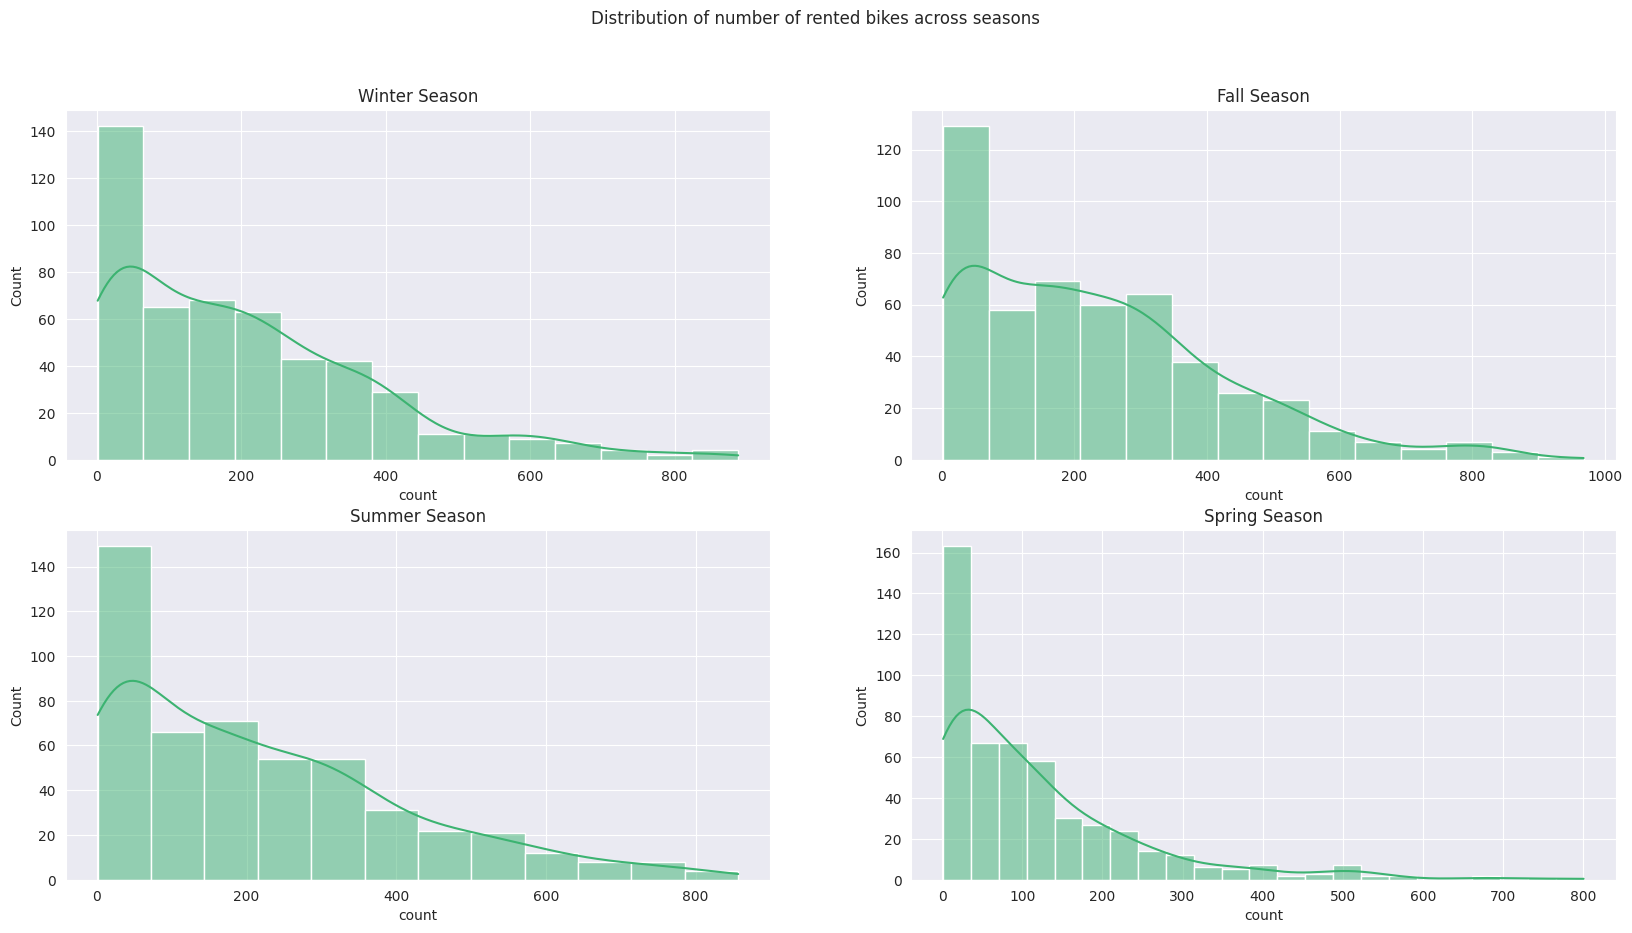

In [42]:
plt.figure(figsize=(20,10))

#histogram for winter season 
plt.subplot(2,2,1)
sns.histplot(winter_sample,kde=True,color='mediumseagreen')
plt.title('Winter Season')

#histogram for fall season 
plt.subplot(2,2,2)
sns.histplot(fall_sample,kde=True,color='mediumseagreen')
plt.title('Fall Season')

#histogram for summer season 
plt.subplot(2,2,3)
sns.histplot(summer_sample,kde=True,color='mediumseagreen')
plt.title('Summer Season')

#histogram for spring season 
plt.subplot(2,2,4)
sns.histplot(spring_sample,kde=True,color='mediumseagreen')
plt.title('Spring Season')

plt.suptitle('Distribution of number of rented bikes across seasons')
plt.show()


**Conclusion**

We see that none of the graphs are normally distributed. Hence we apply log transformation to make these distributions near to normal

In [43]:
log_winter=np.log(winter_sample)
log_fall=np.log(fall_sample)
log_summer=np.log(summer_sample)
log_spring=np.log(spring_sample)

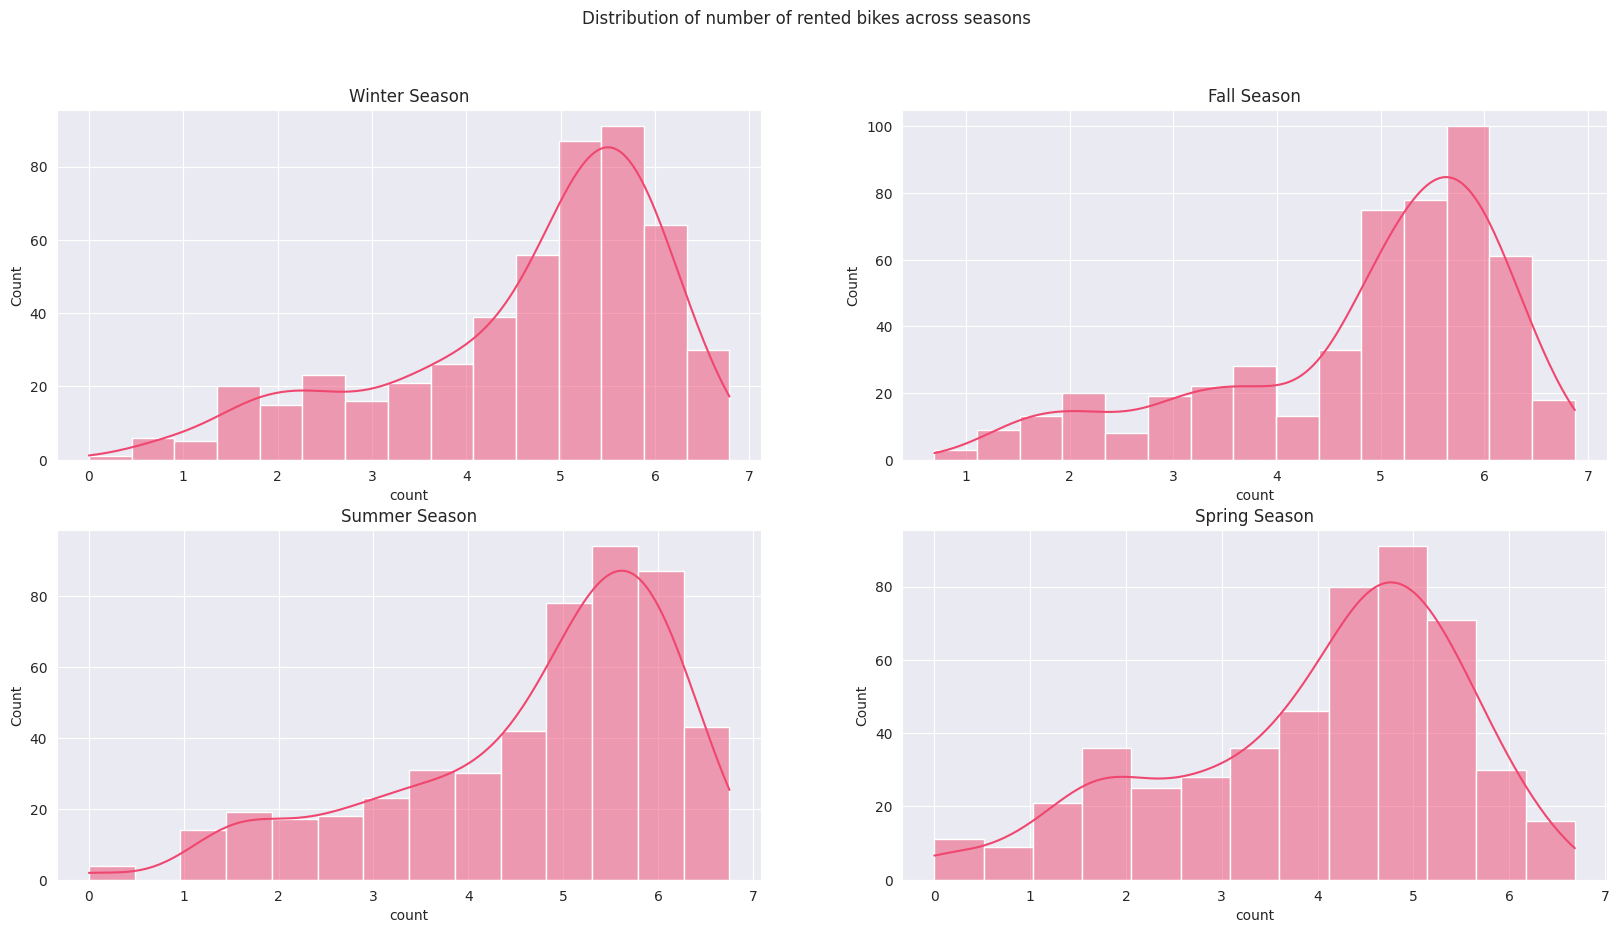

In [44]:
plt.figure(figsize=(20,10))

#histogram for winter season 
plt.subplot(2,2,1)
sns.histplot(log_winter,kde=True,color='#ef476f')
plt.title('Winter Season')

#histogram for fall season 
plt.subplot(2,2,2)
sns.histplot(log_fall,kde=True,color='#ef476f')
plt.title('Fall Season')

#histogram for summer season 
plt.subplot(2,2,3)
sns.histplot(log_summer,kde=True,color='#ef476f')
plt.title('Summer Season')

#histogram for spring season 
plt.subplot(2,2,4)
sns.histplot(log_spring,kde=True,color='#ef476f')
plt.title('Spring Season')

plt.suptitle('Distribution of number of rented bikes across seasons')
plt.show()

**Conclusion**

After applying a log transformation to the samples of each season, it can be inferred that a significant improvement was observed in achieving data distributions that closely resemble normality for each of the seasons.

**Conducting the Shapiro-Wilk Test to assess the normality of the log-normal distribution obtained in the previous step**

**Shapiro-Wilk Test for winter season sample data**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

- H0 : The sample follows a normal distribution
- Ha: The sample does not follow a normal distribution



In [45]:
test_stat,p_value= shapiro(log_winter)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.9024218384194022
p value : 2.3849119897303933e-17
Reject Ho: The sample does not follow a normal distribution


**Conclusion**

Even after applying the log transformation, the sample does not conform to a normal distribution, as demonstrated by the Shapiro-Wilk test.

**Shapiro-Wilk Test for fall season sample data**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

- H0 : The sample follows a normal distribution
- Ha: The sample does not follow a normal distribution



In [46]:
test_stat,p_value= shapiro(log_fall)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.8872056827208757
p value : 1.159561135718569e-18
Reject Ho: The sample does not follow a normal distribution


**Conclusion**

Even after applying the log transformation, the sample does not follow a normal distribution, as demonstrated by the Shapiro-Wilk test.

**Shapiro-Wilk Test for summer season sample data**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

- H0 : The sample follows a normal distribution
- Ha: The sample does not follow a normal distribution

In [47]:
test_stat,p_value= shapiro(log_summer)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.9021523219545213
p value : 2.254047730923185e-17
Reject Ho: The sample does not follow a normal distribution


**Conclusion**

Even after applying the log transformation, the sample does not follow a normal distribution, as demonstrated by the Shapiro-Wilk test.

**Shapiro-Wilk Test for spring season sample data**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

- H0 : The sample follows a normal distribution
- Ha: The sample does not follow a normal distribution

In [48]:
test_stat,p_value= shapiro(log_spring)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.9417087188115643
p value : 4.2212182551141397e-13
Reject Ho: The sample does not follow a normal distribution


**Conclusion**

Even after applying the log transformation, the sample does not follow a normal distribution, as demonstrated by the Shapiro-Wilk test

### Homegenity of Variance test : Levene's Test

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

- H0 : The variance is equal across all groups
- Ha : The variance is not equal across the groups

In [49]:
test_stat,p_value= levene(log_winter,log_fall,log_summer,log_spring,center='median')
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Variance is not equal across the groups ")
else:
 print("Fail to Reject Ho: Variance is equal across all groups")

test stat : 2.294698180210158
p value : 0.0760250947515509
Fail to Reject Ho: Variance is equal across all groups


**Conclusion**

- Since pvalue is not less than 0.05, we fail to reject the null hypothesis.
- This means we do not have sufficient evidence to claim a significant difference in variance across the different seasons. Therefore, the assumption of homogeneity of variances can be considered valid.

### ANOVA Test and Final Conclusion

For ANOVA Test we select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

- H0 : The mean number of cycles rented is the same across different seasons
- Ha: At least one season has a mean number of cycles rented that is significantly different from the others.

In [50]:
f_stat,p_value= f_oneway(log_winter,log_fall, log_summer,log_spring)
print("f stat :",f_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: At least one season has a mean number of cycles rented that is significantly different from the others. ")
else:
 print("Fail to Reject Ho: The mean number of cycles rented is the same across different seasons ")

f stat : 37.11591198393442
p value : 2.448977043081957e-23
Reject Ho: At least one season has a mean number of cycles rented that is significantly different from the others. 


**Conclusion:**

- Since the p-value obtained from our test is less than the predetermined alpha level of 0.05, we have sufficient evidence to reject the null hypothesis for this test.
- Indeed, this implies that we have gathered enough evidence to conclude that there is a significant difference in the mean number of cycles rented across all seasons.

## Is weather type dependent on the season

**To perform such an analysis we perform Chi square test**

A Chi-Square Test of Independence is used to determine whether or not there is a significant association between two categorical variables

In [51]:
data=pd.crosstab(df['weather'],df['season'])
data

season,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225
4,0,1,0,0


- there is only one row in our dataset for weather type 4. We lack sufficient information to determine if it truly correlates with the season. To avoid potential biases and skewed results, it's advisable to exclude this rare weather type from our analysis.

In [54]:
df_removed_weather=df[~(df['weather']==4)]
data=pd.crosstab(df_removed_weather['weather'],df_removed_weather['season'])
data

season,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225


In [56]:
x_stat,p_value,dof,expected=chi2_contingency(data)
expected.min()

211.88929719797886

In [57]:
(len(expected[expected<5])/len(expected))*100

0.0

**Conclusion**

- All of the data points have expected values greater than 5, indicating that the assumption related to the expected values being greater than 5 is satisfied for the chi-square test.

### Chi-Square Test and Final Conclusion

We shall setup Null and alternate Hypotheis to check if Weather is dependent on season

- H0: Weather is not dependent on the season
- Ha: Weather is dependent on the season, meaning they are associated or related

We consider level of significance as 0.05

In [58]:
x_stat,p_value,dof,expected=chi2_contingency(data)
print("X stat :",x_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Weather is dependent on the season")
else:
 print("Fail to Reject Ho: Weather is not dependent on the season")

X stat : 46.101457310732485
p value : 2.8260014509929403e-08
Reject Ho: Weather is dependent on the season


**Final Conclusion**

- Since the p-value obtained from our test is less than the predetermined alpha level of 0.05, we have sufficient evidence to reject the null hypothesis for this test.
- Indeed, this suggests that we have gathered enough evidence to conclude that there is a dependence between weather and the season.

# Recommendations

- Yulu can introduce season-specific promotions and discounts to incentivize bike rentals during peak seasons. For example, offering discounts during summer to encourage more rides can attract additional customers.

- Ensure that bike availability is well-managed to meet the increased demand during peak seasons. This includes bike maintenance, distribution, and tracking to prevent shortages or excess bikes.

- During seasons with adverse weather conditions, such as rain or snow, Yulu can provide weather-ready bikes equipped with features like fenders and all-weather tires. This ensures that riders are comfortable and safe during inclement weather.

- During seasons with adverse weather conditions, such as rain or snow, Yulu can provide weather-ready bikes equipped with features like fenders and all-weather tires. This ensures that riders are comfortable and safe during inclement weather.

- During adverse weather, prioritize rider safety by providing guidelines and recommendations for riding in specific conditions. Ensure bikes are well-maintained and equipped with safety features.